In [130]:
##Implement ANN based model for classification task of datasets diabetes and breast cancer dataset. show the classification results with respect to accuracy , precision , recall , F-score , confusion matrix . Generate ROC and AUC curve

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

In [132]:
from sklearn.datasets import load_breast_cancer, load_diabetes
cancer_data = load_breast_cancer()

In [133]:
def plot_confusion_matrix(cm, title):
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.title(title)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

In [134]:
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
df = pd.DataFrame(data = diabetes.data, columns=diabetes.feature_names)
df['target'] = y
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [135]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
df['target'] = y
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [136]:
def draw_roc_curve(y_test, y_pred_prob):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_score = roc_auc_score(y_test, y_pred_prob)
  plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_score:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

In [137]:
def evaluate_ann_diabetes(test_size = 0.3 , hidden_layer_size = (64,32)):

  diabetes = load_diabetes()
  x = diabetes.data
  y = diabetes.target
  y = (y > np.median(y)).astype(int)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.fit_transform(x_test)
  ann = MLPClassifier(hidden_layer_sizes = hidden_layer_size, max_iter=100,random_state=42)
  ann.fit(x_train_scaled, y_train)
  y_pred = ann.predict(x_test_scaled)
  y_pred_prob = ann.predict_proba(x_test_scaled)[:, 1]
  cm = confusion_matrix(y_test,y_pred)
  cr = classification_report(y_test,y_pred)
  roc_score = roc_auc_score(y_test, y_pred_prob)
  plot_confusion_matrix(cm, 'Confusion Matrix')
  print("ROC AUC curve is \n")
  draw_roc_curve(y_test, y_pred_prob)

  accuracy = accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred,average='weighted')
  recall = recall_score(y_test, y_pred,average='weighted')
  f1 = f1_score(y_test, y_pred,average='weighted')
  print(f"dataset name is - Diabetes dataset\n")
  print(f"Accuracy is - {accuracy}")
  print(f"precision is - {precision}")
  print(f"recall is - {recall}")
  print(f"f1 score is - {f1}")
  print(f"roc score is - {roc_score}")
  print(f"classification report is \n" , cr)

  print("##########")
  print("##########")







/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


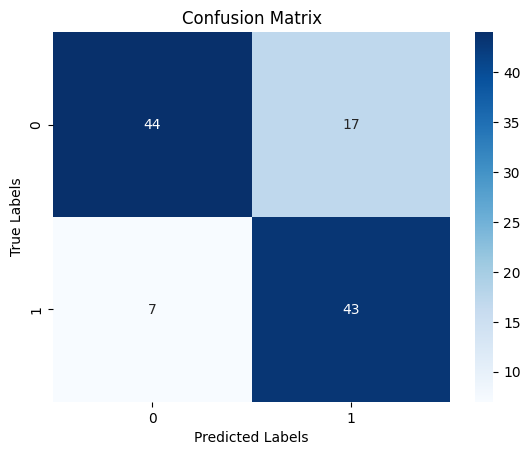

ROC AUC curve is 



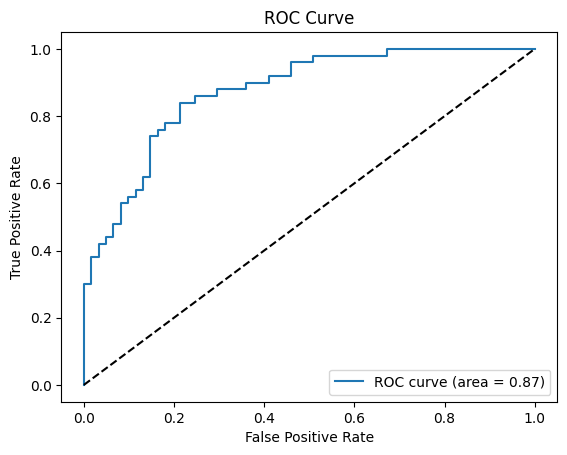

dataset name is - Diabetes dataset

Accuracy is - 0.7837837837837838
precision is - 0.7969440028263558
recall is - 0.7837837837837838
f1 score is - 0.783959283959284
roc score is - 0.8737704918032787
classification report is 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79        61
           1       0.72      0.86      0.78        50

    accuracy                           0.78       111
   macro avg       0.79      0.79      0.78       111
weighted avg       0.80      0.78      0.78       111

##########
##########


In [138]:
hidden_layer_size = (64,32)
test_size = 0.25
evaluate_ann_diabetes(test_size,hidden_layer_size = hidden_layer_size)


In [139]:
def evaluate_ann_cancer(test_size = 0.3 , hidden_layer_size = (64,32)):

  cancer = load_breast_cancer()
  x = cancer.data
  y = cancer.target

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.fit_transform(x_test)
  ann = MLPClassifier(hidden_layer_sizes = hidden_layer_size, max_iter=100,random_state=42)
  ann.fit(x_train_scaled, y_train)
  y_pred = ann.predict(x_test_scaled)
  y_pred_prob = ann.predict_proba(x_test_scaled)[:, 1]
  cm = confusion_matrix(y_test,y_pred)
  cr = classification_report(y_test,y_pred)
  roc_score = roc_auc_score(y_test, y_pred_prob)
  plot_confusion_matrix(cm, 'Confusion Matrix')
  draw_roc_curve(y_test, y_pred_prob)

  accuracy = accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred,average='weighted')
  recall = recall_score(y_test, y_pred,average='weighted')
  f1 = f1_score(y_test, y_pred,average='weighted')
  print(f"dataset name is - Diabetes dataset\n")
  print(f"Accuracy is - {accuracy}")
  print(f"precision is - {precision}")
  print(f"recall is - {recall}")
  print(f"f1 score is - {f1}")
  print(f"roc score is - {roc_score}")
  print(f"classification report is \n" , cr)

  print("##########")
  print("##########")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


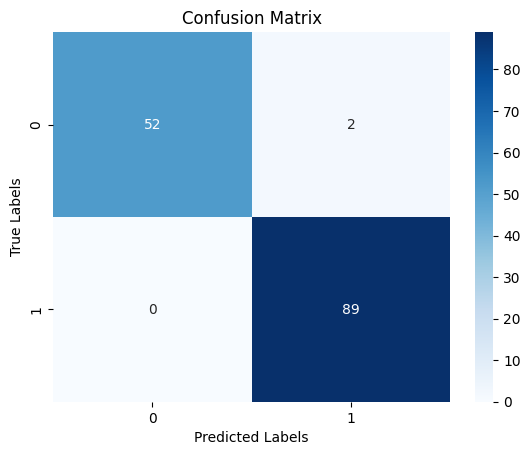

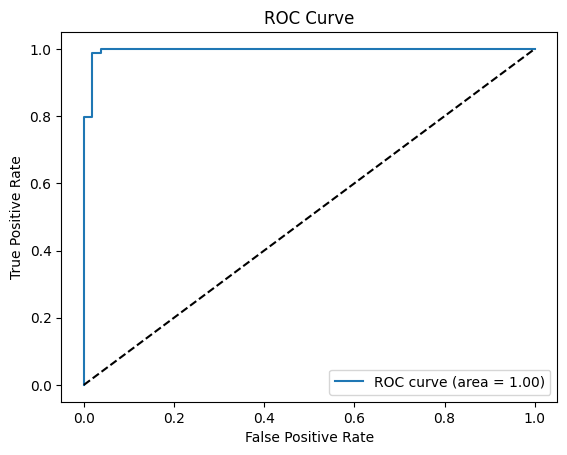

dataset name is - Diabetes dataset

Accuracy is - 0.986013986013986
precision is - 0.9863213709367554
recall is - 0.986013986013986
f1 score is - 0.9859597425635162
roc score is - 0.996046608406159
classification report is 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

##########
##########


In [140]:
hidden_layer_size = (64,32)
test_size = 0.25
evaluate_ann_cancer(test_size,hidden_layer_size = hidden_layer_size)